# Proyecto #2 del Diplomado de Bioestadística: La obesidad modifica la asociación entre vitamina D y hormona paratiroidea

## Script en R
## Víctor Ariel Noriega Ortiz

### 1. Cargamos la base de datos

In [1]:
## Instrucciones para correr este programa:
## Este Script debe correrse en la carpeta que contenga el Script del Dr. Montoya, así como las carpetas 2003-2004 y
## 2005-2006. Si no está alguno de ellos, marcará error. 
## El correr esta linea de código, cargará automáticamente una variable BaseDatos, que es la que genera el programa de
## Dr. Montoya.
source('Prog01_JoseMontoyaConstruirBD.R')

### 2. Creamos dos variables: *hombres* y *mujeres*, la primera guardará todos los renglones de la base de datos que sean hombres, y mujeres lo análogo. También guardamos en vitaminaD_h los valores de vitaminaD para los hombres, y en vitaminaD_m los valores de vitamina D para mujeres

In [2]:
# Nos quedamos con todos los renglones donde el genero (riagendr) es igual a 1, osea es hombre
hombres <- BaseDatos[BaseDatos$riagendr == 1,]
# Hacemos lo análogo para mujeres.
mujeres <- BaseDatos[BaseDatos$riagendr == 2,]
# Obtenemos la vitamina D en hombres, y obtendremos la vitamina D en mujeres. Es decir, que nada más nos vamos a quedar
# con la columna "lbdvidms"
vitaminaD_h <- hombres$lbdvidms
vitaminaD_m <- mujeres$lbdvidms

### 3. Diagramas de caja y resúmenes de las variables.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   9.10   43.73   58.10   58.64   71.30  176.00     717 

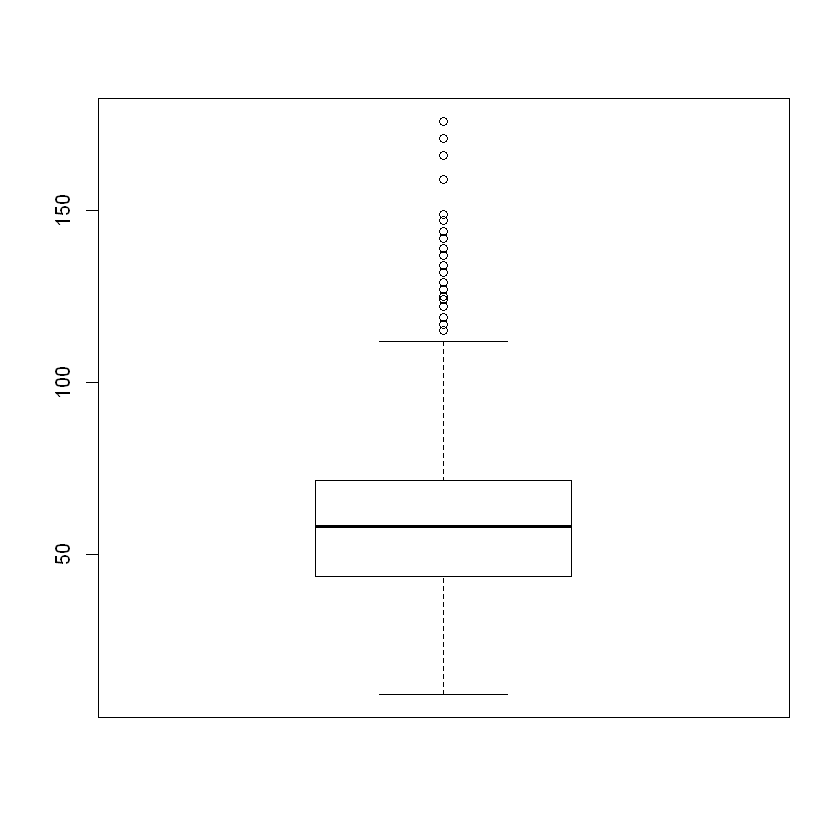

In [13]:
boxplot(vitaminaD_h)
summary(vitaminaD_h)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   9.10   40.90   55.70   57.52   71.30  198.00     852 

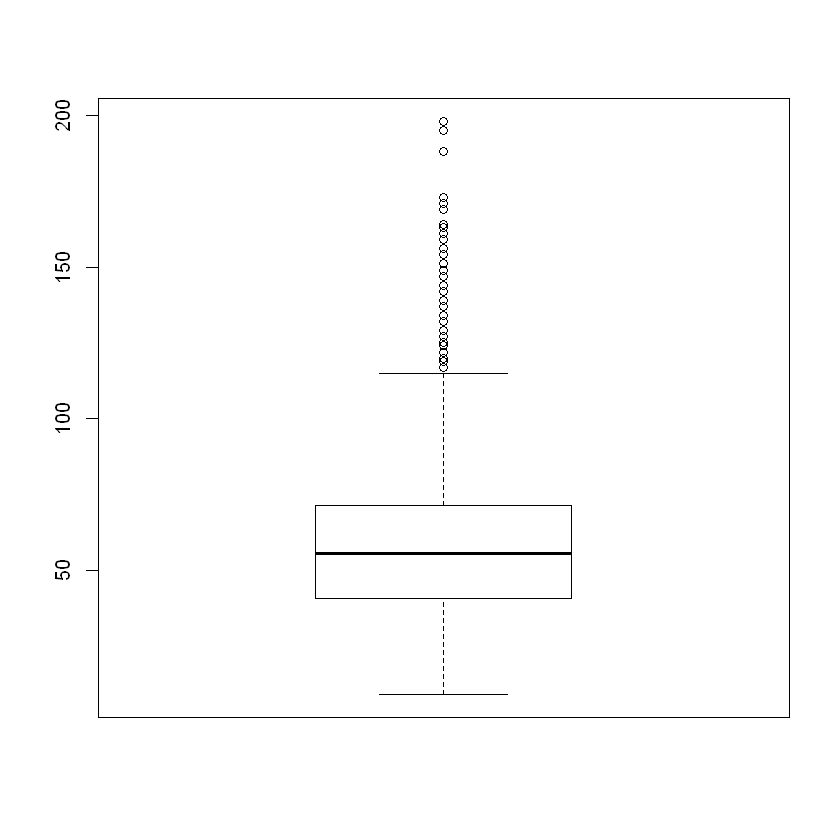

In [12]:
boxplot(vitaminaD_m)
summary(vitaminaD_m)

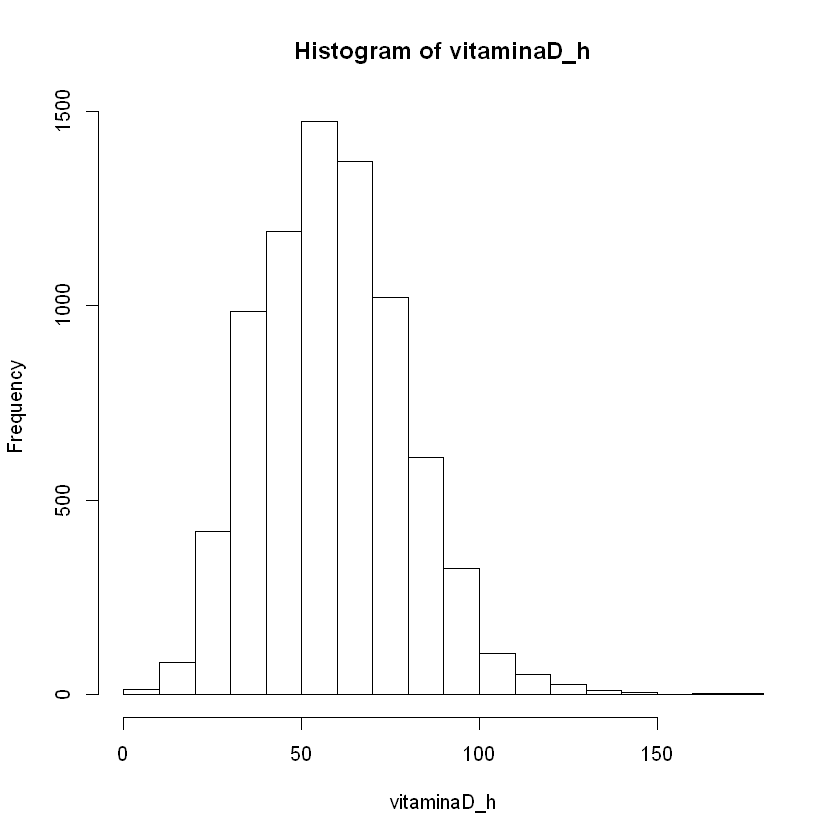

In [15]:
hist(vitaminaD_h)

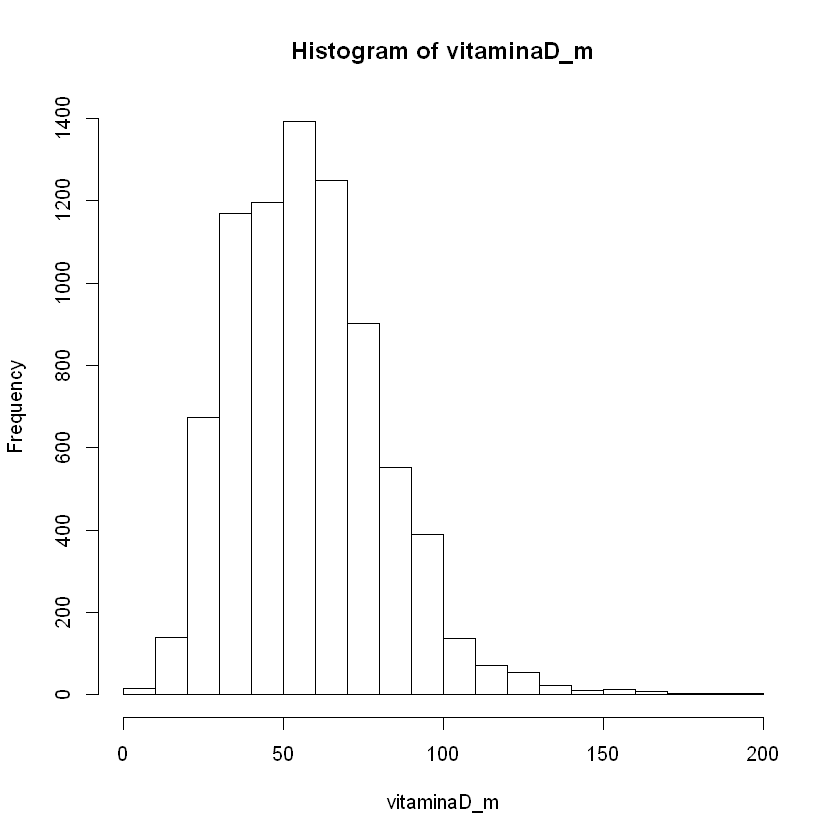

In [16]:
hist(vitaminaD_m)

### 4. Hacemos prueba de normalidad Shapiro para la distribucion de una muestra de 5,000 de la vitamina D para ambos sexos. 
Resultados: Negativo en ambos casos (no hay normalidad).

In [27]:
shapiro.test(sample(vitaminaD_h, 5000))
shapiro.test(sample(vitaminaD_m, 5000))


	Shapiro-Wilk normality test

data:  sample(vitaminaD_h, 5000)
W = 0.9867, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  sample(vitaminaD_m, 5000)
W = 0.96246, p-value < 2.2e-16


### 5. Hacemos pruebas *t* con intervalos de confianza a 0.95 con la vitamina D en hombres y vitamina D en mujeres.

`Resultado: Se obtuvo evidencia estadística que rechaza que la media de vitamina D en hombres sea igual a la media de vitamina D en mujeres.`

In [30]:
t.test(vitaminaD_h, vitaminaD_m)


	Welch Two Sample t-test

data:  vitaminaD_h and vitaminaD_m
t = 3.2026, df = 15563, p-value = 0.001365
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.4343108 1.8046710
sample estimates:
mean of x mean of y 
 58.63529  57.51580 


In [37]:
myvars <- names(hombres) %in% c("ridexmon", "lbdvidms")
vitaminaD_h_1 <- hombres[myvars]
vitaminaD_h_1 <- vitaminaD_h_1[vitaminaD_h_1$ridexmon == 1,]

vitaminaD_h_2 <- hombres[myvars]
vitaminaD_h_2 <- vitaminaD_h_2[vitaminaD_h_2$ridexmon == 2,]

In [39]:
head(vitaminaD_h_1)
tail(vitaminaD_h_1)

,ridexmon,lbdvidms
1,1,31.2
12,1,58.1
22,1,40.9
30,1,94.9
33,1,33.6
36,1,58.1


,ridexmon,lbdvidms
20444,1,54.4
20450,1,73.8
20453,1,42.2
20454,1,44.7
20465,1,25.3
20467,1,42.2


In [40]:
head(vitaminaD_h_2)
tail(vitaminaD_h_2)

,ridexmon,lbdvidms
4,2,70.4
5,2,72.9
8,2,45.9
10,2,NA
11,2,36.0
20,2,75.3


,ridexmon,lbdvidms
20449,2,NA
20456,2,42.2
20457,2,49.5
20458,2,85.9
20468,2,95.6
20469,2,68.9


### 6. Nuevamente intervalos de confianza, ahora probaremos si la vitamina D de los hombres es igual considerando el semestre en el cual se realizó la muestra.

`Resultado: Se encontró evidencia estadística que muestra que la media de la vitamina D en el periodo de mayo-octubre difiere del resto del año en hombres`

In [65]:
t.test(vitaminaD_h_1$lbdvidms, vitaminaD_h_2$lbdvidms)


	Welch Two Sample t-test

data:  vitaminaD_h_1$lbdvidms and vitaminaD_h_2$lbdvidms
t = -17.905, df = 7678.6, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -9.033963 -7.251090
sample estimates:
mean of x mean of y 
 54.39268  62.53520 


### 6.1 Se hace lo equivalente para mujeres, obteniendo el mismo resultado.

In [42]:
myvars <- names(mujeres) %in% c("ridexmon", "lbdvidms")
vitaminaD_m_1 <- mujeres[myvars]
vitaminaD_m_1 <- vitaminaD_m_1[vitaminaD_m_1$ridexmon == 1,]

vitaminaD_m_2 <- mujeres[myvars]
vitaminaD_m_2 <- vitaminaD_m_2[vitaminaD_m_2$ridexmon == 2,]

In [66]:
t.test(vitaminaD_m_1$lbdvidms, vitaminaD_m_2$lbdvidms)


	Welch Two Sample t-test

data:  vitaminaD_m_1$lbdvidms and vitaminaD_m_2$lbdvidms
t = -19.619, df = 7931.2, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -10.93916  -8.95177
sample estimates:
mean of x mean of y 
 52.38888  62.33434 


### 7. Se considerará ahora la hormona paratiroidea, pues es también una variable muy importante de nuestro estudio. Primero, checaremos una posible normalidad (resultado: no es normal) y después compararemos si la media de hormona paratiroidea tiene la misma media en hombres y en mujeres

In [46]:
hormona_h <- hombres$lbxpt21
hormona_m <- mujeres$lbxpt21

shapiro.test(sample(hormona_h, 5000))
shapiro.test(sample(hormona_m, 5000))


	Shapiro-Wilk normality test

data:  sample(hormona_h, 5000)
W = 0.44618, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  sample(hormona_m, 5000)
W = 0.71103, p-value < 2.2e-16


**Resultado: `La hormona paratiroidea tiene la misma media tanto en hombres como en mujeres según esta base de datos`**

In [47]:
t.test(hormona_h, hormona_m)


	Welch Two Sample t-test

data:  hormona_h and hormona_m
t = 0.98564, df = 13906, p-value = 0.3243
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.459984  1.390481
sample estimates:
mean of x mean of y 
 43.99788  43.53263 


In [53]:
myvars <- names(hombres) %in% c("dmdhrbrn", "lbdvidms")
vitD_h_Pais <- hombres[myvars]
vitD_h_M <- vitD_h_Pais[vitD_h_Pais$dmdhrbrn == 2,]
vitD_h_A <- vitD_h_Pais[vitD_h_Pais$dmdhrbrn == 1,]
tail(vitD_h_M)
tail(vitD_h_A)

,dmdhrbrn,lbdvidms
20383,2,25.3
20416,2,51.9
20449,2,NA
20453,2,42.2
20454,2,44.7
20469,2,68.9


,dmdhrbrn,lbdvidms
20450,1,73.8
20456,1,42.2
20457,1,49.5
20458,1,85.9
20465,1,25.3
20467,1,42.2


### 8. Se estudiará la diferencia de medias de vitamina D en hombres nacidos en México y hombres nacidos en América.

**Resultado: `Hay evidencia que podría mostrarnos una diferencia entre medias de vitamina D en los sujetos de interés`**

In [64]:
t.test(vitD_h_M$lbdvidms, vitD_h_A$lbdvidms)


	Welch Two Sample t-test

data:  vitD_h_M$lbdvidms and vitD_h_A$lbdvidms
t = -2.1435, df = 1935, p-value = 0.0322
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.3476179 -0.1042805
sample estimates:
mean of x mean of y 
 57.96336  59.18931 


In [62]:
myvars <- names(mujeres) %in% c("dmdhrbrn", "lbdvidms")
vitD_m_Pais <- mujeres[myvars]
vitD_m_M <- vitD_m_Pais[vitD_m_Pais$dmdhrbrn == 2,]
vitD_m_A <- vitD_m_Pais[vitD_m_Pais$dmdhrbrn == 1,]
tail(vitD_m_M)
tail(vitD_m_A)

,dmdhrbrn,lbdvidms
NA.289,NA,NA
20430,2,59.2
20434,2,76.2
20441,2,37.5
20463,2,32.6
NA.290,NA,NA


,dmdhrbrn,lbdvidms
20455,1,66.5
20460,1,51.9
20461,1,30.2
20462,1,64.1
20464,1,61.6
NA.290,NA,NA


### 8.2 Se estudiará lo mismo que en el caso 8, pero ahora considerando mujeres.

**Resultado: `Hay evidencia estadística que muestra una diferencia de medias entre mujeres nacidas y no nacidas en México en cuanto a sus niveles de vitamina D`.**

In [63]:
t.test(vitD_m_M$lbdvidms, vitD_m_A$lbdvidms)


	Welch Two Sample t-test

data:  vitD_m_M$lbdvidms and vitD_m_A$lbdvidms
t = -7.9579, df = 2090.2, p-value = 2.842e-15
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -6.052865 -3.659422
sample estimates:
mean of x mean of y 
 53.72561  58.58176 


In [67]:
myvars <- names(mujeres) %in% c("dmdhrbrn", "lbxpt21")
horm_m_Pais <- mujeres[myvars]
horm_m_M <- horm_m_Pais[horm_m_Pais$dmdhrbrn == 2,]
horm_m_A <- horm_m_Pais[horm_m_Pais$dmdhrbrn == 1,]
tail(horm_m_M)
tail(horm_m_A)

,dmdhrbrn,lbxpt21
NA.289,NA,NA
20430,2,37
20434,2,52
20441,2,27
20463,2,64
NA.290,NA,NA


,dmdhrbrn,lbxpt21
20455,1,21
20460,1,39
20461,1,39
20462,1,25
20464,1,26
NA.290,NA,NA


### 9. Se estudiará la hormona paratiroidea en mujeres nacidas y no nacidas en México.

**Resultado: `Se tiene evidencia de que la media de la hormona paratiroidea de las mujeres nacidas en México es la misma que el de las mujeres no nacidas en México`**

In [68]:
t.test(horm_m_M$lbxpt21, horm_m_A$lbxpt21)


	Welch Two Sample t-test

data:  horm_m_M$lbxpt21 and horm_m_A$lbxpt21
t = 0.15415, df = 1678.6, p-value = 0.8775
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.384573  1.620779
sample estimates:
mean of x mean of y 
 43.59883  43.48073 


In [69]:
myvars <- names(hombres) %in% c("dmdhrbrn", "lbxpt21")
horm_h_Pais <- hombres[myvars]
horm_h_M <- horm_h_Pais[horm_h_Pais$dmdhrbrn == 2,]
horm_h_A <- horm_h_Pais[horm_h_Pais$dmdhrbrn == 1,]
tail(horm_h_M)
tail(horm_h_A)

,dmdhrbrn,lbxpt21
20383,2,36
20416,2,43
20449,2,NA
20453,2,27
20454,2,51
20469,2,30


,dmdhrbrn,lbxpt21
20450,1,35
20456,1,35
20457,1,86
20458,1,34
20465,1,74
20467,1,53


## 9.2 Se hace lo análogo al caso 9 pero ahora con hombres

**Resultados: `También cuentan con la misma media`**

t.test(horm_h_M$lbxpt21, horm_h_A$lbxpt21)

## 10. Análisis de un modelo predictivo
# A partir de la recomendación del Dr. Durazo de utilizar una regresión no lineal para analizar la relación hormona paratiroidea (variable dependiente) y la vitamina D (variable independiente) se aplicó:

\begin{equation*}
y   = a + (b - a) \cdot e^{-x \cdot e^{c}}
\end{equation*}

## donde $a$ representa la asíntota de la función, $b$ es la ordenada al origen y $c$ es la constante de la exponencial.

In [6]:
require(stats)
require('ggplot2')
fm <- nls(lbxpt21 ~ SSasymp(lbdvidms, Asym, R0, lrc), data = BaseDatos)
summary(fm)

Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang



Formula: lbxpt21 ~ SSasymp(lbdvidms, Asym, R0, lrc)

Parameters:
      Estimate Std. Error t value Pr(>|t|)    
Asym  34.16631    0.71495   47.79   <2e-16 ***
R0   101.73101    4.12747   24.65   <2e-16 ***
lrc   -3.22242    0.06722  -47.94   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 24.79 on 14678 degrees of freedom

Number of iterations to convergence: 7 
Achieved convergence tolerance: 6.458e-06
  (2584 observations deleted due to missingness)


## Para encontrar los parametros utilizamos SSasymp, la cual implementa un algoritmo de descenso de gradiente para optimizar la función de costo (en este caso, Non-linear least squares) .

## El resultado fue:

$a = 34,16$

$b = 101.73$

$c = -3.222$

## 10.1 Una gráfica con los datos y con la curva de modelado.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 2584 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 2584 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 2584 rows containing missing values (geom_point)."

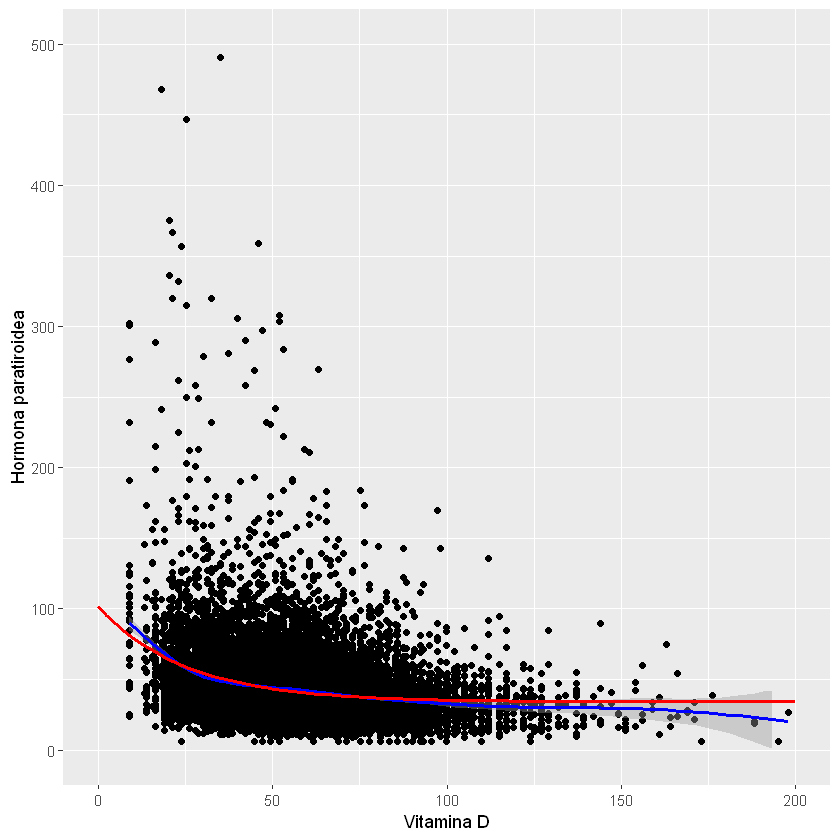

In [16]:
colnames(BaseDatos) <- make.unique(names(BaseDatos))
ggplot(data=BaseDatos, aes(x=lbdvidms, y=lbxpt21)) +
geom_point() +
geom_smooth(color="Blue", se=T) +
geom_smooth(method="nls", formula=y~SSasymp(x, Asym, R0, lrc), color="red", se=F, fullrange=T) +
scale_x_continuous(limits=c(0,200)) +
scale_y_continuous(limits=c(0, 500)) + 
xlab("Vitamina D") + ylab("Hormona paratiroidea")